C:\Users\win11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
C:\Users\win11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
C:\Users\win11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 3h will be used.
  self._init_dates(dates, freq)
C:\Users\win11\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

hello


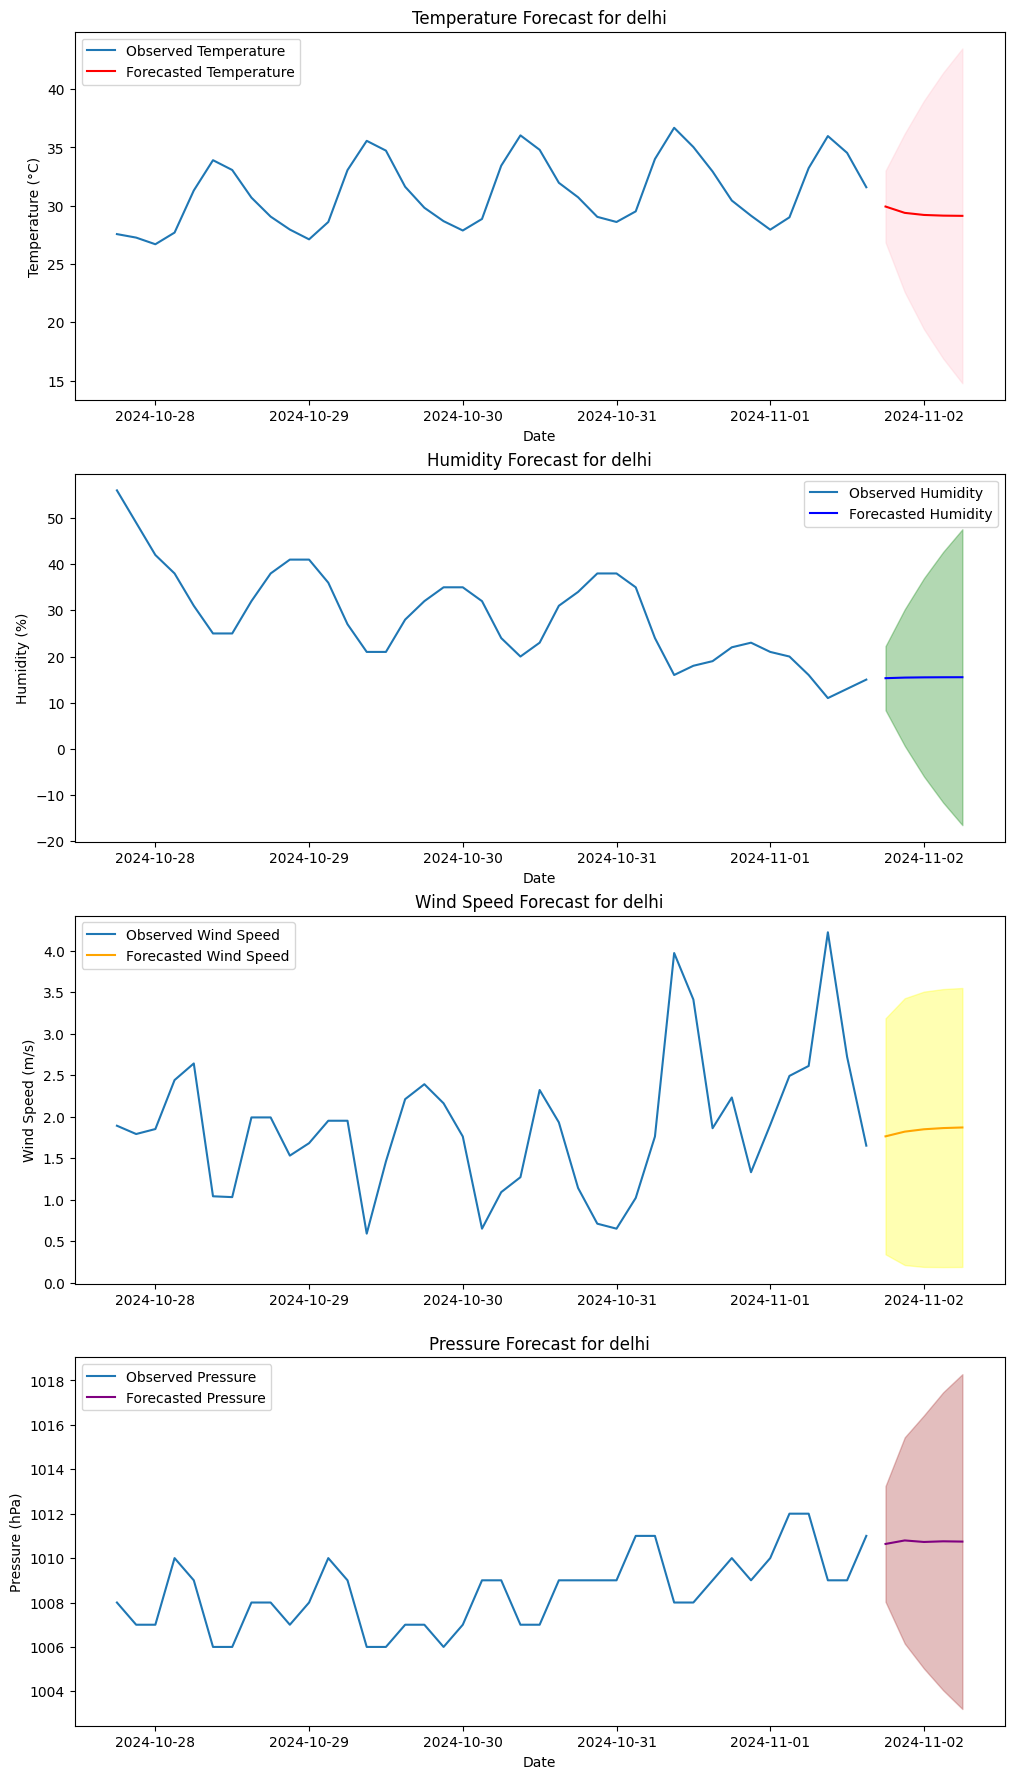

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import numpy as np
import tkinter as tk
from tkinter import messagebox, scrolledtext
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def speak(message):
    forecast_box.insert(tk.END, message + "\n")

def log_text(message):
    with open('weather_logg.txt', 'a') as f:
        f.write(message + '\n')

def get_current_weather(city):
    api_key = '13d6f372052b76fdc44bd6057ffb9dfc'
    base_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
    response = requests.get(base_url)
    data = response.json()
    if data["cod"] != "404":
        weather_desc = data["weather"][0]["description"]
        temp = data["main"]["temp"]
        humidity = data["main"]["humidity"]
        wind_speed = data["wind"]["speed"]
        pressure = data["main"]["pressure"]
        speak(f"The current temperature in {city} is {temp} degrees Celsius with {weather_desc}, \n humidity {humidity}%,\n wind speed {wind_speed} m/s,\n and  wind pressure  is {pressure} hPa.")
        log_text(f"Current weather in {city}: {temp}°C, {weather_desc}, {humidity}%, {wind_speed} m/s, {pressure} hPa")

    else:
        speak("City not found.")
        log_text("City not found.")

def fetch_weather_forecast(city):
    api_key = '13d6f372052b76fdc44bd6057ffb9dfc'
    base_url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric"
    response = requests.get(base_url)
    data = response.json()
    if data["cod"] != "404":
        return data
    else:
        return None

def prepare_forecast_data(data):
    forecast_data = []
    for entry in data['list']:
        forecast_data.append({
            'ds': entry['dt_txt'],
            'temp': entry['main']['temp'],
            'humidity': entry['main']['humidity'],
            'wind_speed': entry['wind']['speed'],
            'pressure': entry['main']['pressure'],
        })
    df = pd.DataFrame(forecast_data)
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace=True)
    return df


def adf_test(series):
    """Perform ADF test to check for stationarity"""
    result = adfuller(series, autolag='AIC')
    speak('ADF Statistic: {}'.format(result[0]))
    speak('p-value: {}'.format(result[1]))
    for key, value in result[4].items():
        speak('Critical Values:')
        speak('   {}: {}'.format(key, value))

def difference_series(series):
    return series.diff().dropna()

def fit_arima_model(series, order=(1,1,1)):
    model = SARIMAX(series, order=order)
    model_fit = model.fit(disp=False)
    return model_fit

def predict_future_weather(model, steps=16):
    forecast = model.get_forecast(steps=steps)
    return forecast.predicted_mean, forecast.conf_int()

#def plot_forecast(df, forecast_temp, conf_int_temp, forecast_humidity, conf_int_humidity, city):
def plot_forecast(df, forecast_temp, conf_int_temp, forecast_humidity, conf_int_humidity, forecast_wind, conf_int_wind, forecast_pressure, conf_int_pressure, city):
    fig, axs = plt.subplots(4, figsize=(12,22))
    axs[0].plot(df.index, df['temp'], label='Observed Temperature')
    axs[0].plot(forecast_temp.index, forecast_temp, color='red', label='Forecasted Temperature')
    axs[0].fill_between(forecast_temp.index, conf_int_temp.iloc[:, 0], conf_int_temp.iloc[:, 1], color='pink', alpha=0.3)
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Temperature (°C)')
    axs[0].set_title(f'Temperature Forecast for {city}')
    axs[0].legend()
    
    axs[1].plot(df.index, df['humidity'], label='Observed Humidity')
    axs[1].plot(forecast_humidity.index, forecast_humidity, color='blue', label='Forecasted Humidity')
    axs[1].fill_between(forecast_humidity.index, conf_int_humidity.iloc[:, 0], conf_int_humidity.iloc[:, 1], color='green', alpha=0.3)
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Humidity (%)')
    axs[1].set_title(f'Humidity Forecast for {city}')
    axs[1].legend()

    axs[2].plot(df.index, df['wind_speed'], label='Observed Wind Speed')
    axs[2].plot(forecast_wind.index, forecast_wind, color='orange', label='Forecasted Wind Speed')
    axs[2].fill_between(forecast_wind.index, conf_int_wind.iloc[:, 0], conf_int_wind.iloc[:, 1], color='yellow', alpha=0.3)
    axs[2].set_ylabel('Wind Speed (m/s)')
    axs[2].set_title(f'Wind Speed Forecast for {city}')
    axs[2].legend()
    
    axs[3].plot(df.index, df['pressure'], label='Observed Pressure')
    axs[3].plot(forecast_pressure.index, forecast_pressure, color='purple', label='Forecasted Pressure')
    axs[3].fill_between(forecast_pressure.index, conf_int_pressure.iloc[:, 0], conf_int_pressure.iloc[:, 1], color='brown', alpha=0.3)
    axs[3].set_xlabel('Date')
    axs[3].set_ylabel('Pressure (hPa)')
    axs[3].set_title(f'Pressure Forecast for {city}')
    axs[3].legend()
    
    return fig


def get_weather_forecast(city, steps=5):
    data = fetch_weather_forecast(city)
    if data:
        df = prepare_forecast_data(data)
        forecast_box.insert(tk.END, f"Weather forecast for {city}:\n")
        adf_test(df['temp'])
        df_diff = difference_series(df['temp'])
        adf_test(df_diff)
        model_temp = fit_arima_model(df['temp'])
        forecast_temp, conf_int_temp = predict_future_weather(model_temp, steps=steps)
        model_humidity = fit_arima_model(df['humidity'])
        forecast_humidity, conf_int_humidity = predict_future_weather(model_humidity, steps=steps)
        model_wind = fit_arima_model(df['wind_speed'])
        forecast_wind, conf_int_wind = predict_future_weather(model_wind, steps=steps)
        model_pressure = fit_arima_model(df['pressure'])
        forecast_pressure, conf_int_pressure = predict_future_weather(model_pressure, steps=steps)
        fig = plot_forecast(df, forecast_temp, conf_int_temp, forecast_humidity, conf_int_humidity, forecast_wind, conf_int_wind, forecast_pressure, conf_int_pressure, city)
        for date, temp in forecast_temp.items():
            forecast_box.insert(tk.END, f"{date.date()}: {temp:.2f} °C\n")
        for date, humidity in forecast_humidity.items():
            forecast_box.insert(tk.END, f"{date.date()}: {humidity:.2f} %\n")
        for date, wind in forecast_wind.items():
            forecast_box.insert(tk.END, f"{date.date()}: {wind:.2f} m/s\n")


        # fig = plot_forecast(df, forecast_temp, conf_int_temp, forecast_humidity, conf_int_humidity, city)
        # for date, temp in forecast_temp.items():
        #     forecast_box.insert(tk.END, f"{date.date()}: {temp:.2f} °C\n")
        # for date, humidity in forecast_humidity.items():
        #     forecast_box.insert(tk.END, f"{date.date()}: {humidity:.2f} %\n")
        # for widget in graph_frame.winfo_children():
        #     widget.destroy()



        canvas = FigureCanvasTkAgg(fig, master=graph_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

    else:
        speak("City not found.")
        log_text("City not found.")

def on_get_current_weather():
    city = city_entry.get()
    forecast_box.delete(1.0, tk.END)
    get_current_weather(city)

def on_get_weather_forecast():
    city = city_entry.get()
    forecast_box.delete(1.0, tk.END)
    get_weather_forecast(city, steps=5)

root = tk.Tk()
root.title("Weather Forecasting App")

tk.Label(root, text="Enter city name:").grid(row=0, column=0, padx=10, pady=10)
city_entry = tk.Entry(root)
city_entry.grid(row=0, column=1, padx=10, pady=10)

tk.Button(root, text="Get Current Weather", command=on_get_current_weather).grid(row=1, column=0, padx=10, pady=10)
tk.Button(root, text="Get Weather Forecast", command=on_get_weather_forecast).grid(row=1, column=1, padx=10, pady=10)

forecast_box = scrolledtext.ScrolledText(root, width=50, height=10)
forecast_box.grid(row=2, column=0, columnspan=2, padx=10, pady=10)

graph_frame = tk.Frame(root)
graph_frame.grid(row=3, column=0, columnspan=5, padx=15, pady=30, sticky="nsew")

graph_canvas = tk.Canvas(graph_frame)
graph_scrollbar = tk.Scrollbar(graph_frame, orient="vertical", command=graph_canvas.yview)
scrollable_frame = tk.Frame(graph_canvas)

scrollable_frame.bind(
    "<Configure>",
    lambda e: graph_canvas.configure(
        scrollregion=graph_canvas.bbox("all")
    )
)

graph_canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")
graph_canvas.configure(yscrollcommand=graph_scrollbar.set)

graph_canvas.pack(side="left", fill="both", expand=True)
graph_scrollbar.pack(side="right", fill="y")

# Start the GUI event loop
root.mainloop()
print("hello")
